# Genetic Linear Regression with Pandas
A solution... via evolution!

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [59]:
sample_num = 10
beta_true = [3, 5]
x = np.random.normal(5, 1, sample_num)
y = beta_true[0]*x + beta_true[0] + np.random.normal(x, 1, sample_num)

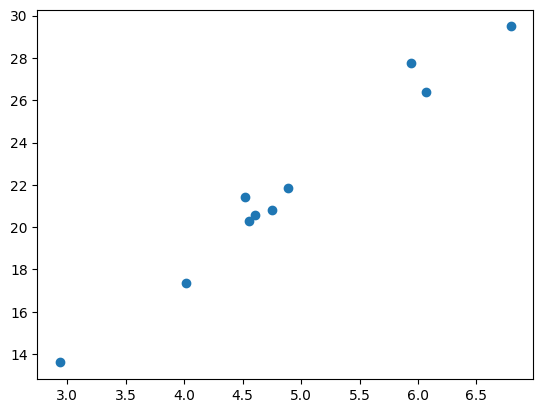

In [60]:
plt.scatter(x, y);

In [94]:
obs = pd.DataFrame({
    'x': np.random.normal(5, 1, sample_num),
    'y': beta_true[0]*x + beta_true[0] + np.random.normal(x, 1, sample_num)
})
obs

,x,y
0,6.464815,22.098720
1,4.774169,21.980166
2,4.388952,27.157672
3,5.702550,15.321981
4,6.342145,20.628560
5,4.985809,18.533144
6,6.251761,27.911310
7,3.005328,31.252320
8,7.050820,21.007612
9,6.643043,19.754049


In [93]:
betas = pd.DataFrame({
    'b0': np.random.normal(-10,10, 100),
    'b1': np.random.normal(-10,10, 100)
})
betas

,b0,b1
0,-18.307603,-23.104832
1,-18.136220,-8.072907
2,6.015638,-15.521071
3,-22.536727,-13.139588
4,-5.458754,-20.117518
...,...,...
95,-19.491077,-2.567917
96,-1.474868,-15.648788
97,-8.002698,-15.789467
98,-12.222207,-6.821291


In [110]:
cart_prod = pd.merge(obs, betas, how='cross')
cart_prod['yhat'] = cart_prod['x']*cart_prod['b1'] + cart_prod['b0']
cart_prod['sq_error'] = (cart_prod['y'] - cart_prod['yhat'])**2
cart_prod

,x,y,b0,b1,yhat,sq_error
0,6.464815,22.098720,-18.307603,-23.104832,-167.676073,36014.471762
1,6.464815,22.098720,-18.136220,-8.072907,-70.326072,8542.342155
2,6.464815,22.098720,6.015638,-15.521071,-94.325218,13554.533127
3,6.464815,22.098720,-22.536727,-13.139588,-107.481736,16791.094449
4,6.464815,22.098720,-5.458754,-20.117518,-135.514792,24842.019051
...,...,...,...,...,...,...
995,6.643043,19.754049,-19.491077,-2.567917,-36.549861,3170.130216
996,6.643043,19.754049,-1.474868,-15.648788,-105.430437,15671.155516
997,6.643043,19.754049,-8.002698,-15.789467,-112.892808,17595.188522
998,6.643043,19.754049,-12.222207,-6.821291,-57.536333,5973.803077


In [106]:
grouped_df = cart_prod.groupby(['b0','b1'])['sq_error'].mean()
# grouped_df['rmse'] = np.sqrt(grouped_df['rmse'])